# Abalone Project

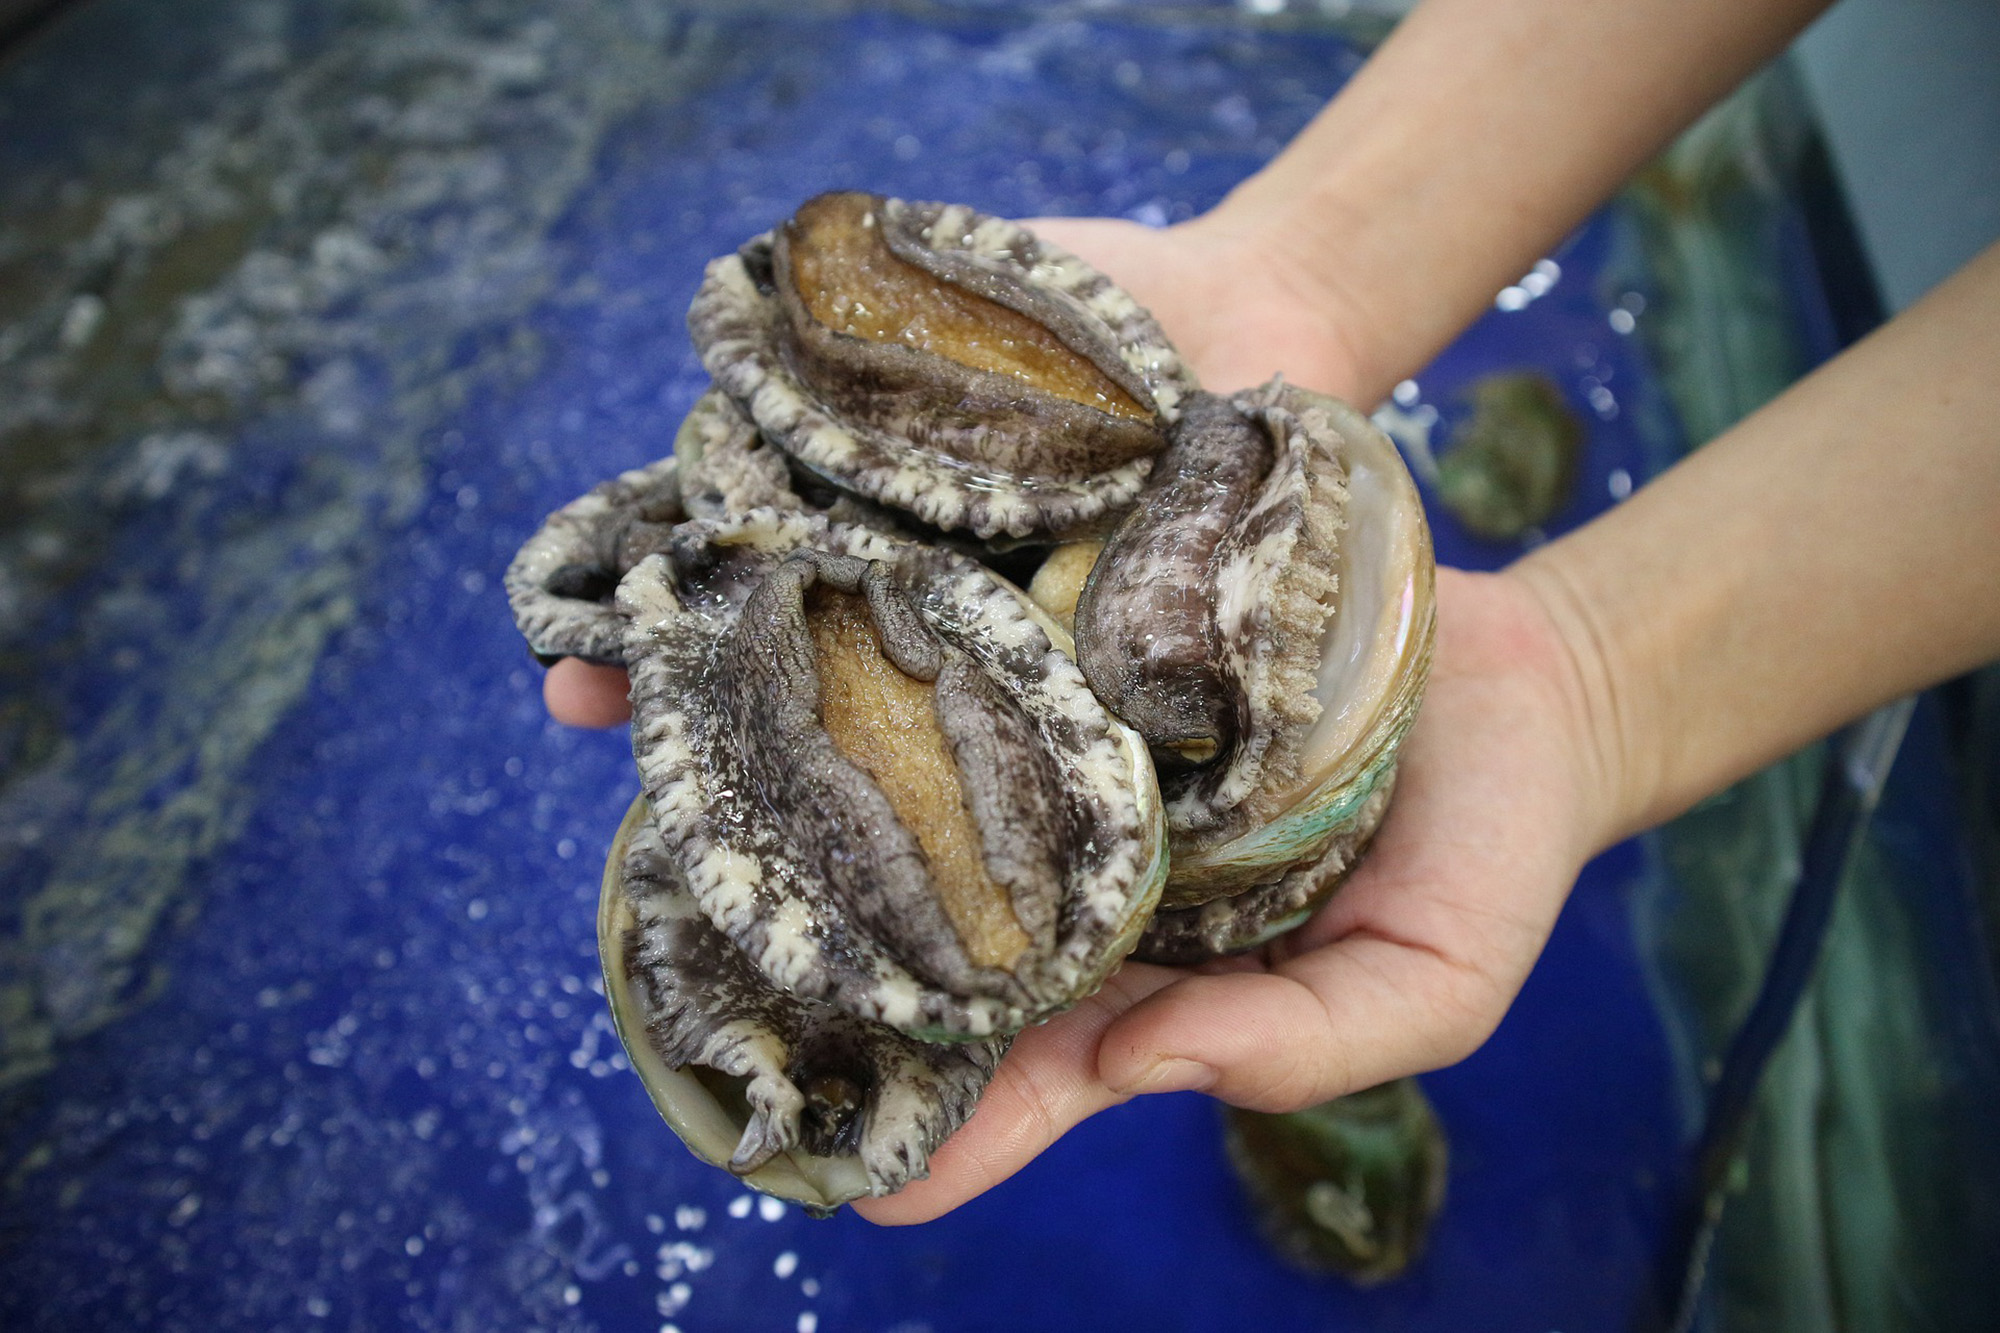

According to wikipedia, Abalone  is a common name for any of a group of small to very large marine gastropod molluscs in the family Haliotidae. They are marine snails.

Abalone are also known as ear shells, sea ears, and sometimes, albeit rarely, muttonfish or muttonshells in parts of Australia. In South Africa they are referred to as perlemoen. The Maori name for three species in New Zealand is pāua.

To estimate the age of an abalone, an expert performs a  tedious and time consuming process. We'd like to make create a machine learning algorithm to predict age given several features.

The dataset comes from the UCI Repository and is comprised of 8 features and 4177 measurements.

We are given the following as features:

Sex: nominal - M (male), F (female), I (infant)

Length: continuous - longest shell measurement (in mm)

Diameter: continuous - measurement perpendicular to legnth (in mm)

Height: continuous - with meat in shell (in mm)

Whole weight: continuous - the whole abalone (in grams)

Shucked weight: continuous - weight of the meat (in grams)

Viscera weight: continuous - gut weight after bleeding (in grams)

Shell weight: continuous - after being dried (in grams)

Rings: integer - +1.5 gives the age in years



In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pandas_profiling import ProfileReport
import seaborn as sns

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

#import lightgbm as lgb

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

import lightgbm as lgb
import seaborn as sns
import xgboost as xgb

In [3]:

df = pd.read_csv("abalone.data")
df.columns = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']

df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
sex               4176 non-null object
length            4176 non-null float64
diameter          4176 non-null float64
height            4176 non-null float64
whole_weight      4176 non-null float64
shucked_weight    4176 non-null float64
viscera_weight    4176 non-null float64
shell_weight      4176 non-null float64
rings             4176 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
df.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000
mean,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,9.932471
std,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601
min,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000,29.000000


In [6]:
df.boxplot(patch_artist=True, rot=90, figsize=(12,8))

In [7]:
df.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021AFF30C188>,
      dtype=object)

In [8]:
df["sex"].value_counts(normalize=True)
#Data is more or less balanced

M    0.365661
I    0.321360
F    0.312979
Name: sex, dtype: float64

In [9]:
df.groupby(["sex"])["rings"].agg(["mean", "min", "max"]).plot(kind="bar")

In [10]:
df.corr()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
length,1.000000,0.986813,0.827552,0.925255,0.897905,0.903010,0.897697,0.557123
diameter,0.986813,1.000000,0.833705,0.925452,0.893159,0.899726,0.905328,0.575005
height,0.827552,0.833705,1.000000,0.819209,0.774957,0.798293,0.817326,0.558109
whole_weight,0.925255,0.925452,0.819209,1.000000,0.969403,0.966372,0.955351,0.540818
shucked_weight,0.897905,0.893159,0.774957,0.969403,1.000000,0.931956,0.882606,0.421256
viscera_weight,0.903010,0.899726,0.798293,0.966372,0.931956,1.000000,0.907647,0.504274
shell_weight,0.897697,0.905328,0.817326,0.955351,0.882606,0.907647,1.000000,0.628031
rings,0.557123,0.575005,0.558109,0.540818,0.421256,0.504274,0.628031,1.000000


In [11]:
plt.figure(figsize=(8,8))
plt.title('Correlation Matrix',size="xx-large")
print("")

sns.heatmap(df.corr(), linewidths=0.1, annot=True)


In [12]:
#Because of high levels correlation among many of the features, we can drop some of them in order 
#to avoid the multicollinearity problem 

#We can see that diameter is highly correlated with length (ρ = 0.99), 
#whole_weight is highly correlated with diameter (ρ = 0.93),
#shucked_weight is highly correlated with whole_weight (ρ = 0.97), 
#viscera_weight is highly correlated with shucked_weight (ρ = 0.93) 
#shell_weight is highly correlated with viscera_weight (ρ = 0.91)
#We can therefore eliminate all of these variables and only consider height and length

#Indeed,

df.corr().abs().idxmax()

length                    length
diameter                diameter
height                    height
whole_weight        whole_weight
shucked_weight    shucked_weight
viscera_weight    viscera_weight
shell_weight        shell_weight
rings                      rings
dtype: object

# EDA

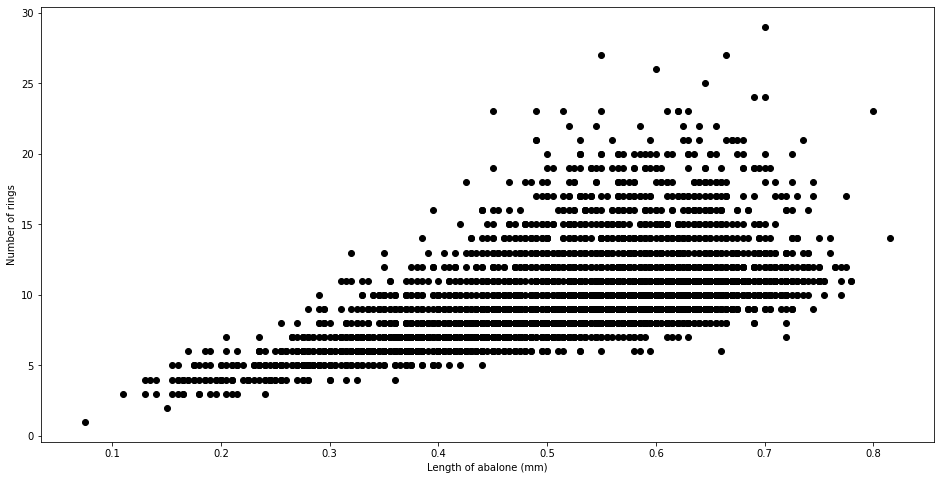

In [13]:
%matplotlib inline
plt.figure(figsize=(16,8))
plt.scatter(df['length'], df['rings'], c='black')
plt.xlabel('Length of abalone (mm)')
plt.ylabel('Number of rings')
plt.show()

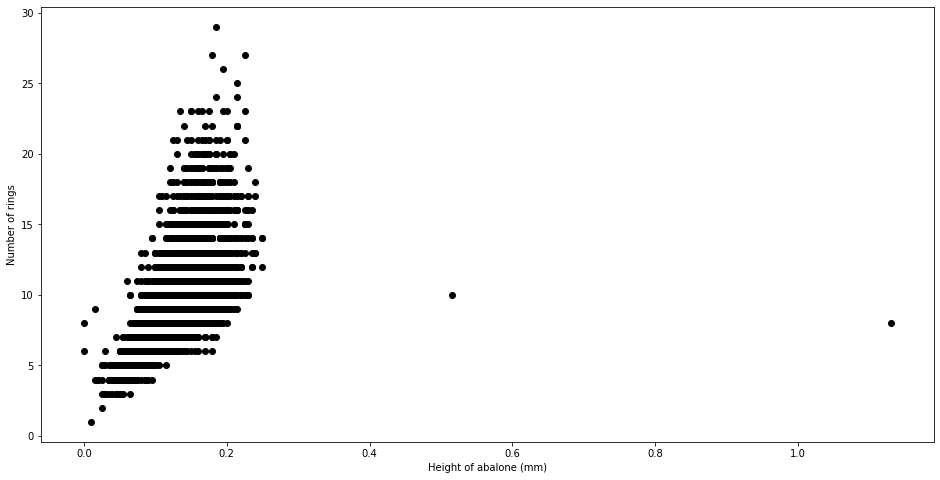

In [14]:
plt.figure(figsize=(16,8))
plt.scatter(df['height'], df['rings'], c='black')
plt.xlabel('Height of abalone (mm)')
plt.ylabel('Number of rings')
plt.show()

# 3D Visualization

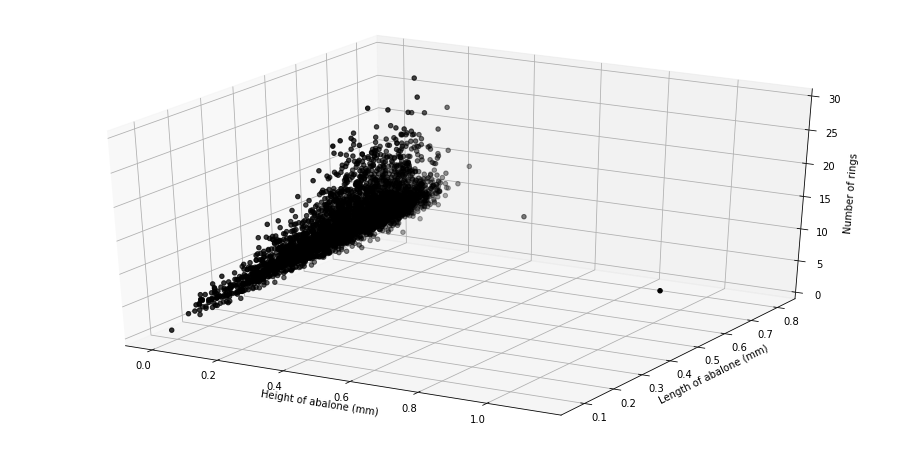

In [15]:
fig = plt.figure(figsize=(16,8))
ax = plt.axes(projection='3d')

ax.set_xlabel('Height of abalone (mm)')
ax.set_ylabel('Length of abalone (mm)')
ax.set_zlabel('Number of rings')
ax.scatter3D(df['height'], df['length'], df['rings'], c='black');

plt.show()

## OneHot Encoding (Accounting for Dummy Variables)

In [16]:
encoded_df = pd.get_dummies(df)
encoded_df.head()



,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,sex_F,sex_I,sex_M
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,0,1,0


In [17]:
print(encoded_df.shape)

(4176, 11)


C:\Users\malic\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


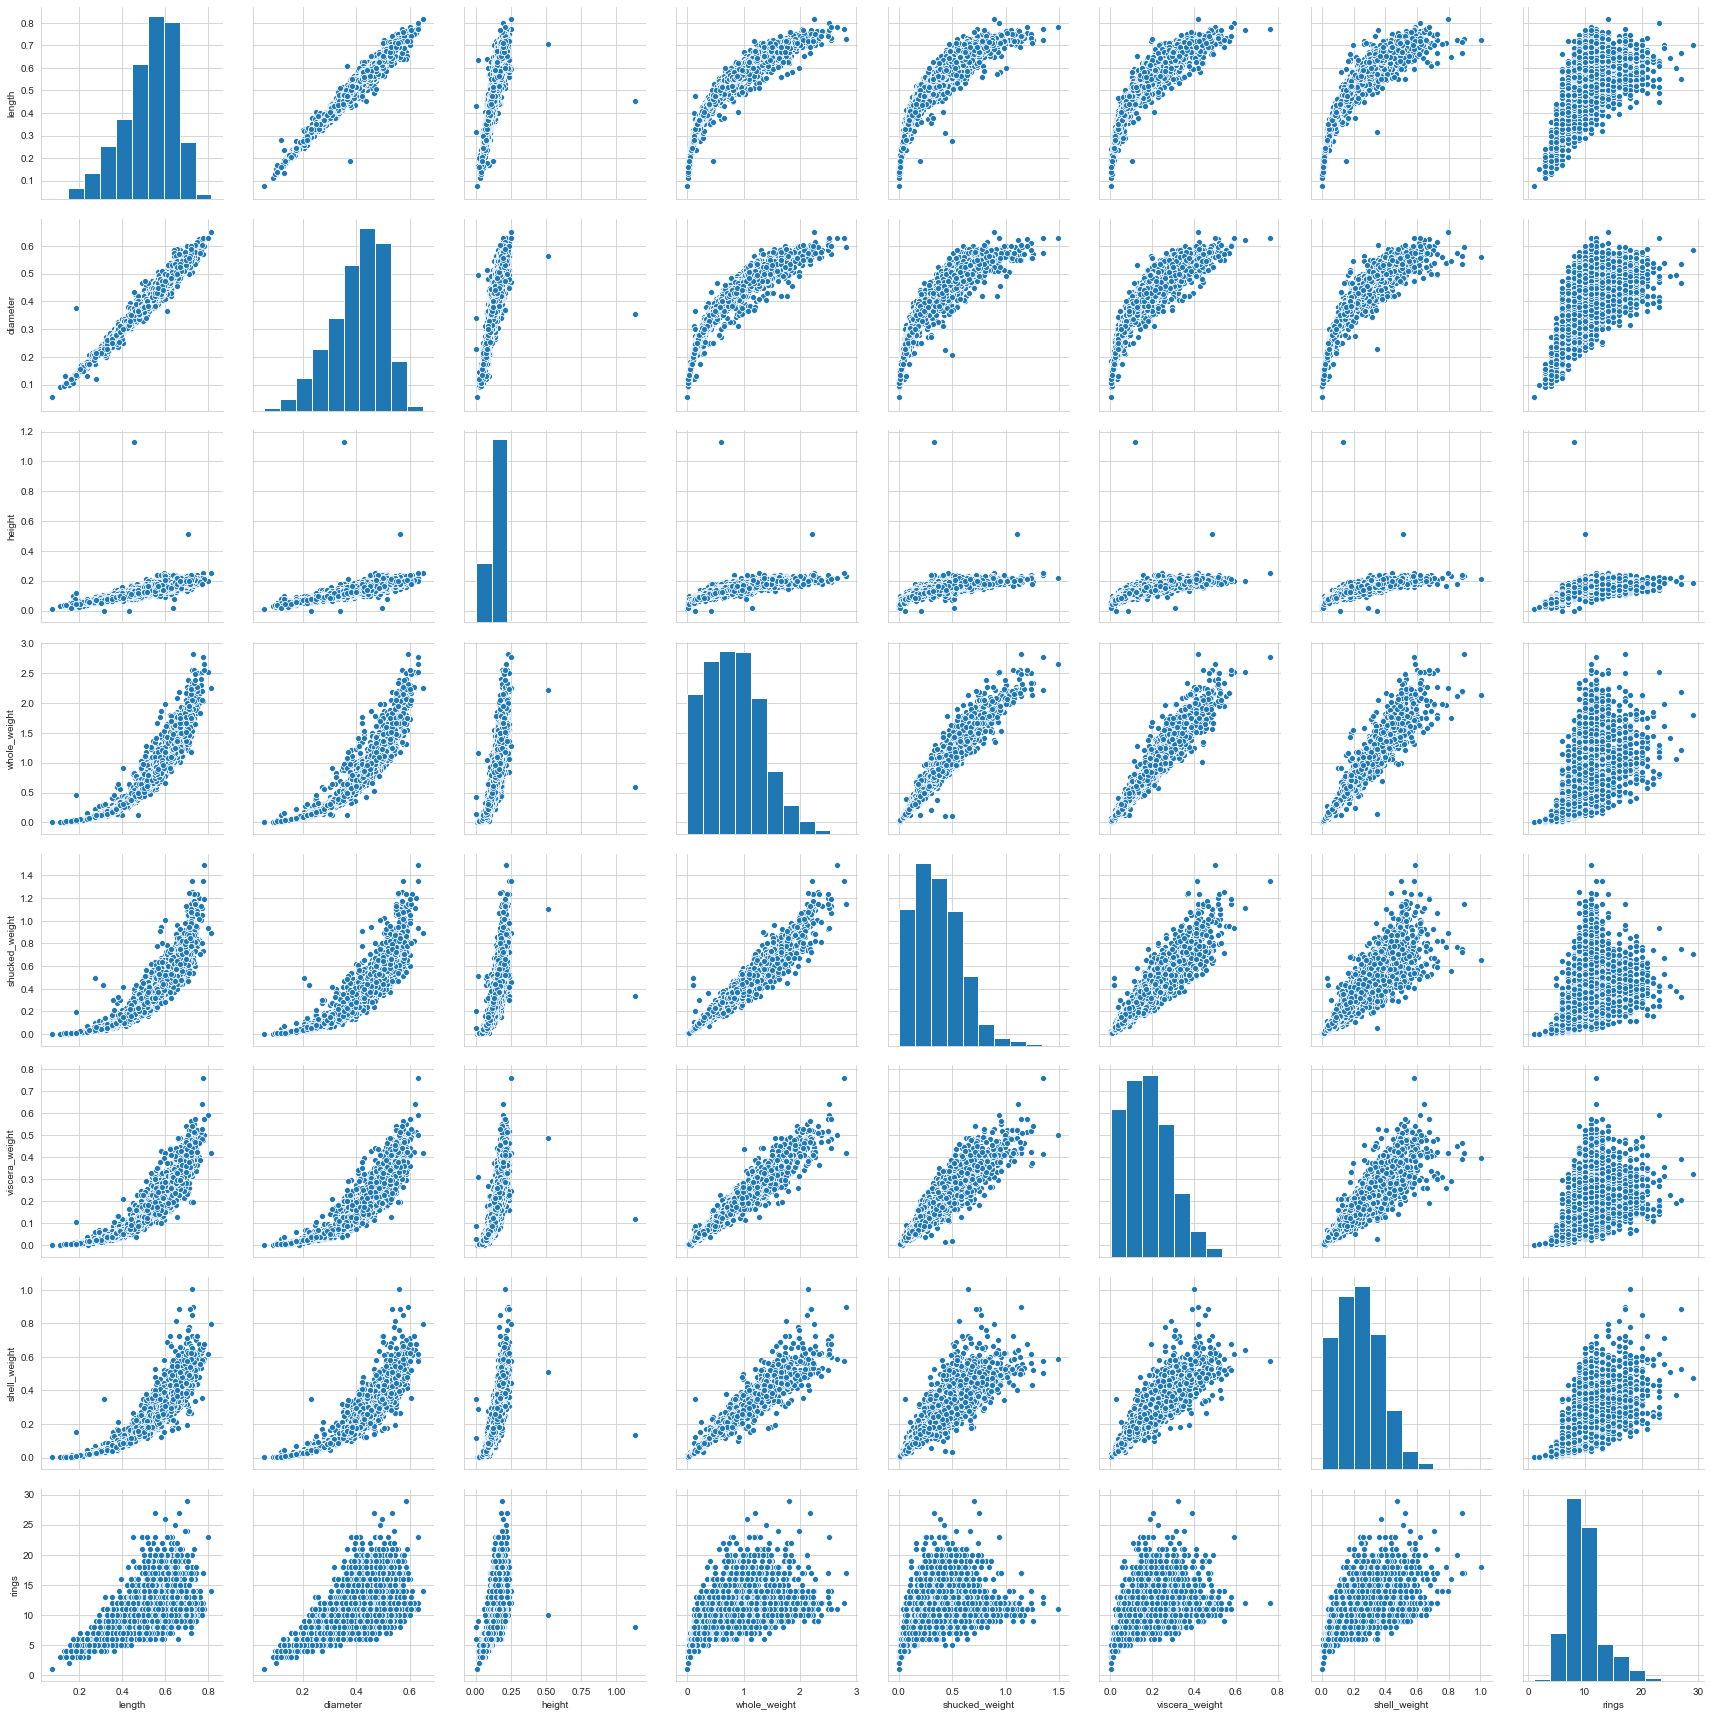

In [18]:
sns.set_style('whitegrid')
sns.pairplot(df, size=3)
plt.show()

In [19]:
encoded_df.corr()
#how to pick features based on scatter plots

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,sex_F,sex_I,sex_M
length,1.000000,0.986813,0.827552,0.925255,0.897905,0.903010,0.897697,0.557123,0.309602,-0.551613,0.236783
diameter,0.986813,1.000000,0.833705,0.925452,0.893159,0.899726,0.905328,0.575005,0.318581,-0.564431,0.240567
height,0.827552,0.833705,1.000000,0.819209,0.774957,0.798293,0.817326,0.558109,0.298306,-0.518828,0.215869
whole_weight,0.925255,0.925452,0.819209,1.000000,0.969403,0.966372,0.955351,0.540818,0.299668,-0.557757,0.252305
shucked_weight,0.897905,0.893159,0.774957,0.969403,1.000000,0.931956,0.882606,0.421256,0.263919,-0.521995,0.252048
viscera_weight,0.903010,0.899726,0.798293,0.966372,0.931956,1.000000,0.907647,0.504274,0.308363,-0.556267,0.242489
shell_weight,0.897697,0.905328,0.817326,0.955351,0.882606,0.907647,1.000000,0.628031,0.306248,-0.547116,0.235652
rings,0.557123,0.575005,0.558109,0.540818,0.421256,0.504274,0.628031,1.000000,0.250620,-0.435958,0.181426
sex_F,0.309602,0.318581,0.298306,0.299668,0.263919,0.308363,0.306248,0.250620,1.000000,-0.464461,-0.512449
sex_I,-0.551613,-0.564431,-0.518828,-0.557757,-0.521995,-0.556267,-0.547116,-0.435958,-0.464461,1.000000,-0.522462


# Modeling

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [25]:
#Trivial Linear Regression
#Here we simply include the length as an explanatory variable
X1=encoded_df[['length']].values
y1=encoded_df['rings'].values
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.20, random_state=0)
lr1=LinearRegression()
lr1.fit(X1, y1)
y_pred1=lr1.predict(X_test1)
print(mean_squared_error(y_test1, y_pred1))
print(r2_score(y_test1, y_pred1))
print("Coefficients:", lr1.coef_)

6.182839776179798
0.3387204976545495
Coefficients: [14.95339797]


In [27]:
#Slightly Less Trivial
#Here we include both the length and the height
#Because of correlations among features,
#The EDA suggests that we only need to look at length and height of the Abalone
X2=encoded_df[['length', 'height']].values
y2=encoded_df['rings'].values
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.20, random_state=0)
lr2=LinearRegression()
lr2.fit(X2, y2)
y_pred2=lr2.predict(X_test2)
print(mean_squared_error(y_test2, y_pred2))
print(r2_score(y_test2, y_pred2))
print("Coefficients:", lr2.coef_)

5.702472295391489
0.3900977256174101
Coefficients: [ 8.11270384 23.73595111]


In [28]:
#(We can however use dummy variables as well. We only need to use 2 since the third one will necessary be determined)
#Even less Trivial 

X3=encoded_df[['length', 'height', 'sex_F','sex_I','sex_M']].values
y3=encoded_df['rings'].values
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.20, random_state=0)
lr3=LinearRegression()
lr3.fit(X3, y3)
y_pred3=lr3.predict(X_test3)
print(mean_squared_error(y_test3, y_pred3))
print(r2_score(y_test3, y_pred3))
print("Coefficients:", lr3.coef_)

5.642615489387062
0.39649965099789475
Coefficients: [ 6.42039259 21.19637608  0.46021792 -0.74677322  0.28655529]


# Multivariate Linear Regression

. 
#The factor that is being predicted (the factor that the equation solves for) is called the dependent variable.
#The dependent variable (number of rings) can be thought of as a continuous variable.

Linear regression is straightforward to understand and explain, and can be regularized to avoid overfitting.
In addition, linear models can be updated easily with new data using stochastic gradient descent.
Weaknesses: Linear regression performs poorly when there are non- linear relationships.
    
    
    
Linear Regression is the process of finding a plane that best fits the data points available
on the plot, so that we can use it to predict output values for inputs that are not present
in the data set we have, with the belief that those outputs would fall on the plane. 

In [29]:
#Because of correlations among features,
#The EDA suggested that we only needed to look at length and height of the Abalone for a simple multicariate 
#linear regression. However we can use all the features provided we use regularized regressions

X=encoded_df[['length', 'height', 'sex_F','sex_I','sex_M','diameter', 'whole_weight', 
               'shucked_weight', 'viscera_weight','shell_weight']].values
y=encoded_df['rings'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[0.475  0.125  0.     ... 0.186  0.107  0.145 ]
 [0.445  0.125  1.     ... 0.1785 0.1125 0.14  ]
 [0.535  0.145  0.     ... 0.33   0.189  0.25  ]
 ...
 [0.595  0.15   0.     ... 0.377  0.1925 0.235 ]
 [0.625  0.175  1.     ... 0.4485 0.2165 0.3595]
 [0.415  0.1    0.     ... 0.169  0.067  0.105 ]]
[[0.65   0.155  0.     ... 0.6185 0.288  0.365 ]
 [0.605  0.13   0.     ... 0.432  0.174  0.26  ]
 [0.44   0.1    0.     ... 0.209  0.0735 0.103 ]
 ...
 [0.33   0.075  0.     ... 0.056  0.035  0.05  ]
 [0.595  0.185  1.     ... 0.416  0.224  0.485 ]
 [0.585  0.17   1.     ... 0.365  0.271  0.29  ]]
[ 9  9 10 ...  8  8  7]
[ 9 11  7 13  9 10  7 12 19  8 13  9  9  8  8 20 10  5  5 10 10 13  5  8
  6  8 12  8  8  7 10  8  9  9  8  8 10  8  8 12 11  9 10  9  8  9 10 11
  8  8  8 10  8 11  9  8  7  7  8 19 10 12  7 10 14  8  8  9  6 10  9  7
  4 12 10  5 13 12  6 10  8  8 10  6 11 16  7  9  7  8 10 10 11 11 11  9
  8 11  9 16  6  6 12 14 10 11  8  9  6 11  9 10  6 11  8  6  7 10 11  5
 12  6 11 1

# PipeLine

In [31]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor


In [32]:
#Pipelines
pipelines={
'rf':make_pipeline(RandomForestRegressor(random_state=0)),
'gb':make_pipeline(GradientBoostingRegressor(random_state=0)),
'ridge':make_pipeline(Ridge(random_state=0)),
'lasso':make_pipeline(Lasso(random_state=0)),
'enet':make_pipeline(ElasticNet(random_state=0)),
}
    


In [36]:
#Making a Grid
grid={
'rf':{
'randomforestregressor__min_samples_split':[2,4,6],
'randomforestregressor__min_samples_leaf':[1,2,3]
},
    
'gb':{
    'gradientboostingregressor__alpha':[0.001,0.005,0.01,0.05,0.1,0.5,0.99]
},

'ridge':{
    'ridge__alpha':[0.001,0.005,0.01,0.05,0.1,0.5,0.99,2]
},
'lasso':{
    'lasso__alpha':[0.001,0.005,0.01,0.05,0.1,0.5,0.99,2]
},
'enet':{
    'elasticnet__alpha':[0.001,0.005,0.01,0.05,0.1,0.5,0.99,2]
}

}

In [37]:
#Making an empty dictionary and populating it with fitted models
fit_models={}
for algorithm , pipeline in pipelines.items():
    model=GridSearchCV(pipeline,grid[algorithm],cv=10,n_jobs=-1)
    try:
        print('Commencing training for {}...'.format(algorithm))
        model.fit(X_train,y_train)
        fit_models[algorithm]=model
    except NotFittedError as e:
        print("Something went wrong")

Commencing training for rf...


C:\Users\malic\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Commencing training for gb...
Commencing training for ridge...
Commencing training for lasso...
Commencing training for enet...


In [38]:
#Now we predict on our testing set
for algorithm, model in fit_models.items():
    ypred=model.predict(X_test)
    print('{} scores-R2:{} MAE:{} RMSE:{}'.format(algorithm,r2_score(y_test,ypred), mean_absolute_error(y_test,ypred), mean_squared_error(y_test,ypred)))

rf scores-R2:0.5180651986726872 MAE:1.4903905265388517 RMSE:4.506000335112789
gb scores-R2:0.5361939545974549 MAE:1.4662024478960884 RMSE:4.336499854866911
ridge scores-R2:0.5014901834050046 MAE:1.5608895708560449 RMSE:4.660973630556445
lasso scores-R2:0.4999727646808263 MAE:1.5631917697724043 RMSE:4.675161212073328
enet scores-R2:0.5002773529260053 MAE:1.562829058980895 RMSE:4.672313368898135


In [39]:
#Let's a look at our dictionary of  fitted models
fit_models

{'rf': GridSearchCV(cv=10, error_score='raise-deprecating',
              estimator=Pipeline(memory=None,
                                 steps=[('randomforestregressor',
                                         RandomForestRegressor(bootstrap=True,
                                                               criterion='mse',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                                               min_samples_leaf=1,
                                                               min_samples_split=2,
                                                               min_weight_fra

Now for each model, we pick the best parameters

In [40]:
fit_models['rf'].best_estimator_

Pipeline(memory=None,
         steps=[('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=3, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=10, n_jobs=None,
                                       oob_score=False, random_state=0,
                                       verbose=0, warm_start=False))],
         verbose=False)

In [41]:
RF_model=RandomForestRegressor(n_estimators=10, criterion='friedman_mse',random_state=0)
RF_model.fit(X_train, y_train)



RandomForestRegressor(bootstrap=True, criterion='friedman_mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [42]:
fit_models['gb'].best_estimator_

Pipeline(memory=None,
         steps=[('gradientboostingregressor',
                 GradientBoostingRegressor(alpha=0.001,
                                           criterion='friedman_mse', init=None,
                                           learning_rate=0.1, loss='ls',
                                           max_depth=3, max_features=None,
                                           max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimators=100,
                                           n_iter_no_change=None,
                                           presort='auto', random_state=0,
                                           s

In [43]:
GB_model=GradientBoostingRegressor(alpha=.001, criterion='friedman_mse', learning_rate=0.1,random_state=0)
GB_model.fit(X_train, y_train)



GradientBoostingRegressor(alpha=0.001, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

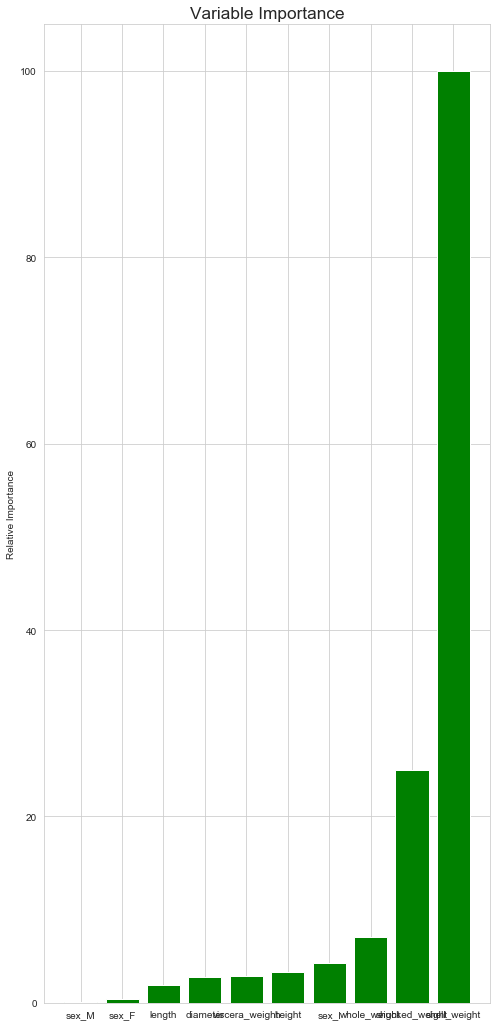

In [48]:
#This shows that height is the most important feature. Length is a far way second

X=encoded_df[['length', 'height', 'sex_F','sex_I','sex_M','diameter', 'whole_weight', 
               'shucked_weight', 'viscera_weight','shell_weight']]

y=encoded_df['rings'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

feature_importance = GB_model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(8, 18))
plt.bar(pos, feature_importance[sorted_idx], align='center', color="green")
plt.xticks(pos, X_train.keys()[sorted_idx])
plt.ylabel('Relative Importance')
plt.title('Variable Importance' ,size="xx-large")
plt.show()

# Selecting Best Estimators and Finding Coefficients of the Regularized Regressions

In [49]:
fit_models['ridge'].best_estimator_

Pipeline(memory=None,
         steps=[('ridge',
                 Ridge(alpha=0.5, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=0,
                       solver='auto', tol=0.001))],
         verbose=False)

In [50]:
Ridge_model=Ridge(alpha=.99, random_state=0, max_iter=None)
Ridge_model.fit(X_train, y_train)

Ridge_model.coef_ # This should be what you're looking for

#y_pred = best_model.predict(X_test)

array([  1.98714859,   6.47361858,   0.30150334,  -0.64174779,
         0.34024445,   7.21863191,   7.24875839, -17.74950367,
        -7.0960859 ,  10.70799793])

In [51]:
fit_models['lasso'].best_estimator_

Pipeline(memory=None,
         steps=[('lasso',
                 Lasso(alpha=0.001, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=0, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [52]:
Lasso_model=Lasso(alpha=.01, fit_intercept=True, random_state=0, max_iter=1000)
Lasso_model.fit(X_train, y_train)

Lasso_model.coef_ 

array([  0.        ,   0.        ,   0.        ,  -1.02743591,
         0.        ,   5.62707956,   4.51982234, -13.98415897,
        -0.        ,  13.18130191])

In [53]:
fit_models['enet'].best_estimator_

Pipeline(memory=None,
         steps=[('elasticnet',
                 ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True,
                            l1_ratio=0.5, max_iter=1000, normalize=False,
                            positive=False, precompute=False, random_state=0,
                            selection='cyclic', tol=0.0001,
                            warm_start=False))],
         verbose=False)

In [54]:
Enet_model=ElasticNet(alpha=.01, random_state=0, max_iter=1000)
Enet_model.fit(X_train, y_train)

Enet_model.coef_ 

array([ 1.78019526,  1.09862337,  0.13609518, -1.14768567,  0.03500388,
        2.15995282,  3.1394315 , -6.47236194, -0.        ,  6.15939982])

# LIGHT GBM

Light GBM is a very popular Gradient Boosting Decision tree algorithm known for its effective implementations. It doesn't work that well when there are many features(We don't have this problem here)

Usually, LGBM allows us to have a higher accuracy and a faster training speed on the model. It uses low memory and is  compatible with both small and large datasets.

In [55]:
modelll = lgb.LGBMRegressor(learning_rate=0.03,max_depth=5, random_state=42)
params = {
    'learning_rate': [0.001,0.005,0.01,0.05,0.1,0.5,0.99],
    "n_estimators":[300,400,500,600,700,800]
}
lgm_regressor = GridSearchCV(modelll, params, scoring='neg_mean_squared_error', cv=5, refit=True)
lgm_regressor.fit(X_train, y_train)
lgm_regressor.best_params_



{'learning_rate': 0.01, 'n_estimators': 500}

In [56]:
modelll = lgb.LGBMRegressor(learning_rate=0.01,max_depth=5, n_estimators=500, random_state=42)

modelll.fit(X_train,y_train)
y_pred = modelll.predict(X_test)
# Test RMSE
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Test RMSE: {test_rmse}')
print(f'R2Score:{r2_score(y_test, y_pred)}')

Test RMSE: 2.055739200466323
R2Score:0.5480055483642963


# Compiling the Results

In [57]:
rmse_compilation = {
    'model': ['Random Forest', 'GradientBoost', 'Ridge', 'Lasso', 'ElasticNet', 'LightGBM'],
    'RMSE' : [4.777, 4.37, 4.66, 4.67, 4.67, 2.06],
    'R_2'  : [.521,.532,.501,.499,.500,.548]
}



rmse_df = pd.DataFrame(data=rmse_compilation)
rmse_df.sort_values(by=['RMSE'], ascending=True)

,model,RMSE,R_2
5,LightGBM,2.060,0.548
1,GradientBoost,4.370,0.532
2,Ridge,4.660,0.501
3,Lasso,4.670,0.499
4,ElasticNet,4.670,0.500
0,Random Forest,4.777,0.521


# Summary
We saw that height is a very important variable and height comes in second place.
We started off with naive linear models and then used slightly more complicated regularized models. They performed nearly identically although as expected, the Lasso model does some variable selection for us. Random Forest and Gradient Boosting were also used and did not perform much better. We select the Light GBM algorithm. Light GBM performed the best but only accounted for 54.8 percent of the variation around the mean of the dependent variable.
More work needs to be done to improve R^2 value and decrease RMSE